# Gather precovery imaging

This notebook shows how to get precovery imaging for objects found with KBMOD. Once we have an object
identified we can record the observations we used in MPC format and use the following tools to search
other telescope data for possible images where the object may be present to help orbit determination.

## Precovery Classes

Here we describe the methods we have for identifying precovery images:

### Solar System Object Imaging Search (SSOIS)

Currently our `precovery_utils` only has a class to use the [SSOIS service](https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/en/ssois/index.html)
from the Canadian Astronomy Data Centre and described in [Gwyn, Hill and Kavelaars (2012)](http://adsabs.harvard.edu/abs/2012PASP..124..579G).

In [1]:
from precovery_utils import ssoisPrecovery

#### Create Query URL from MPC formatted file

In the notebook `orbit_fitting_demo.ipynb` we show how to use the `ephem_utils.py` code in KBMOD to create a file with the observations for an identified object in KBMOD and turn it into an MPC formatted file. The file created in that demo is saved here as `kbmod_mpc.dat`. We will use that file to show how the precovery interface works.

In [2]:
ssois_query = ssoisPrecovery()

In [3]:
query_url = ssois_query.format_search_by_arc_url('kbmod_mpc.dat')

In [4]:
print(query_url)

http://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/cadcbin/ssos/ssosclf.pl?lang=en;obs=+++++c111112++c2015+04+18.27432+13+23+40.289-08+02+56.61+++++++++++++++++++++807%0D%0A+++++c111112++c2015+04+18.27756+13+23+40.277-08+02+56.56+++++++++++++++++++++807%0D%0A+++++c111112++c2015+04+18.28079+13+23+40.266-08+02+56.51+++++++++++++++++++++807%0D%0A+++++c111112++c2015+04+18.28873+13+23+40.236-08+02+56.39+++++++++++++++++++++807%0D%0A+++++c111112++c2015+04+18.29192+13+23+40.225-08+02+56.34+++++++++++++++++++++807%0D%0A+++++c111112++c2015+04+19.26576+13+23+36.638-08+02+41.20+++++++++++++++++++++807%0D%0A+++++c111112++c2015+04+19.26900+13+23+36.626-08+02+41.15+++++++++++++++++++++807%0D%0A+++++c111112++c2015+04+19.27548+13+23+36.602-08+02+41.05+++++++++++++++++++++807%0D%0A+++++c111112++c2015+04+19.27871+13+23+36.590-08+02+41.00+++++++++++++++++++++807%0D%0A+++++c111112++c2015+04+21.26671+13+23+29.268-08+02+10.10+++++++++++++++++++++807%0D%0A+++++c111112++c2015+04+21.27008+13+23+29.256-08+02+10.05++++

#### Query service via URL

The formatted URL above will work in a browser to return results. But we have the `query_ssois` function that will pull down the results and provide them in a pandas dataframe all in one go.

In [5]:
results_df = ssois_query.query_ssois(query_url)

In [6]:
results_df.head()

,Image,MJD,Filter,Exptime,Object_RA,Object_Dec,Image_target,Telescope_or_Instrument,MetaData,Datalink
0,980501102256a,50934.432593,none,20,194.721816,5.238269,980501102256a,NEAT-GEODSS-Maui,http://sbn.psi.edu/archive/neat/geodss/data/g1...,NaN
1,980501105205a,50934.452836,none,20,194.721537,5.238318,980501105205a,NEAT-GEODSS-Maui,http://sbn.psi.edu/archive/neat/geodss/data/g1...,NaN
2,980501112210a,50934.473727,none,20,194.721249,5.238369,980501112210a,NEAT-GEODSS-Maui,http://sbn.psi.edu/archive/neat/geodss/data/g1...,NaN
3,980502105859a,50935.457627,none,20,194.707766,5.240725,980502105859a,NEAT-GEODSS-Maui,http://sbn.psi.edu/archive/neat/geodss/data/g1...,NaN
4,980502112839a,50935.478229,none,20,194.707485,5.240774,980502112839a,NEAT-GEODSS-Maui,http://sbn.psi.edu/archive/neat/geodss/data/g1...,NaN


#### Create direct data download link
It's possible to take the URLs for the data provided in `results_df['MetaData']` and turn them directly into a download link clickable from here in the notebook.

In [7]:
from IPython.display import HTML
image_data_link = results_df["MetaData"].iloc[-1]
HTML('<a href="{}">{}</a>'.format(image_data_link, image_data_link))

#### Compare KBMOD data to available data

In [8]:
%pylab inline
from ephem_utils import mpc_reader

Populating the interactive namespace from numpy and matplotlib


In [9]:
kbmod_observations = mpc_reader('kbmod_mpc.dat')

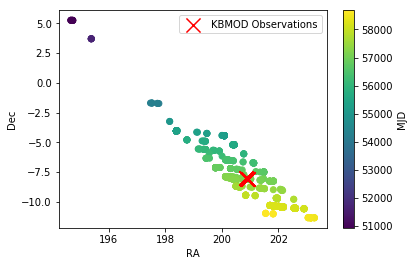

In [10]:
scatter(kbmod_observations.ra.deg, kbmod_observations.dec.deg, marker='x', s=200, c='r', label='KBMOD Observations', zorder=10)
plt.legend()
scatter(results_df['Object_RA'], results_df['Object_Dec'], c=results_df['MJD'])
cbar = plt.colorbar()
plt.xlabel('RA')
plt.ylabel('Dec')
cbar.set_label('MJD')